In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [59]:
dataset = pd.read_csv('Mall_Customers.csv')

In [60]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [61]:
X = dataset[['Annual Income (k$)','Spending Score (1-100)']]

In [62]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


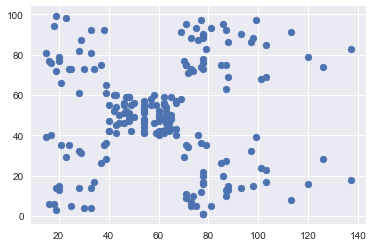

In [63]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])

In [64]:
import scipy.cluster.hierarchy as sch

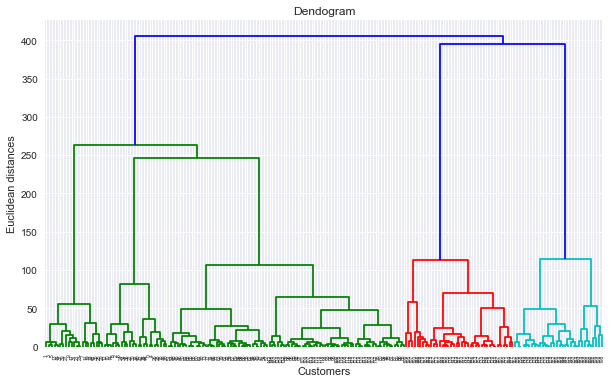

In [65]:
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [68]:
y_hc = hc.fit_predict(X)

In [69]:
y_hc.shape

(200,)

In [70]:
X.shape

(200, 2)

In [71]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [72]:
y = pd.DataFrame(y_hc,columns=['Cluster'])

In [73]:
y.head()

,Cluster
0,4
1,3
2,4
3,3
4,4


In [74]:
X =X.join(y)

In [75]:
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [76]:
X[X['Cluster']==4]['Annual Income (k$)']

0     15
2     16
4     17
6     18
8     19
10    19
12    20
14    20
16    21
18    23
20    24
22    25
24    28
26    28
28    29
30    30
32    33
34    33
36    34
38    37
40    38
42    39
44    39
Name: Annual Income (k$), dtype: int64

In [77]:
X[X['Cluster']==4]['Spending Score (1-100)']

0     39
2      6
4     40
6      6
8      3
10    14
12    15
14    13
16    35
18    29
20    35
22     5
24    14
26    32
28    31
30     4
32     4
34    14
36    17
38    26
40    35
42    36
44    28
Name: Spending Score (1-100), dtype: int64

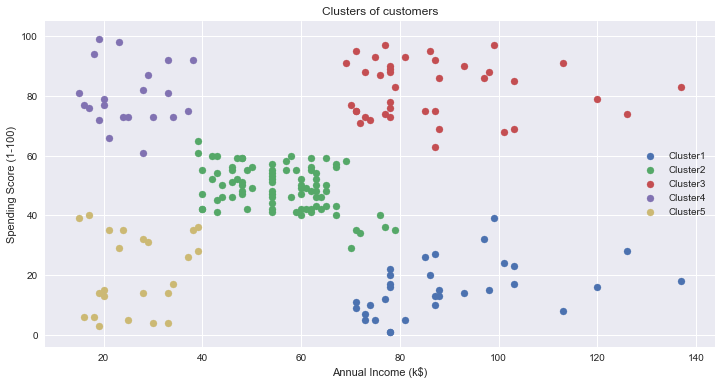

In [96]:
plt.figure(figsize=(12,6))
plt.scatter(X[X['Cluster']==0]['Annual Income (k$)'],X[X['Cluster']==0]['Spending Score (1-100)'],label='Cluster1')
plt.scatter(X[X['Cluster']==1]['Annual Income (k$)'],X[X['Cluster']==1]['Spending Score (1-100)'],label='Cluster2')
plt.scatter(X[X['Cluster']==2]['Annual Income (k$)'],X[X['Cluster']==2]['Spending Score (1-100)'],label='Cluster3')
plt.scatter(X[X['Cluster']==3]['Annual Income (k$)'],X[X['Cluster']==3]['Spending Score (1-100)'],label='Cluster4')
plt.scatter(X[X['Cluster']==4]['Annual Income (k$)'],X[X['Cluster']==4]['Spending Score (1-100)'],label='Cluster5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()